In [1]:
import rioxarray
import os
import json
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
CHELSA_DIR = "/shares/wegner.ics.uzh/CHELSA"
monthly_raster_names = os.listdir(CHELSA_DIR + "/climatologies/1981-2010/")
monthly_raster_names.remove("bio")
bio_files = []
for file in os.listdir(CHELSA_DIR + "/climatologies/1981-2010/bio"):
    if "bio" in file:
        bio_files.append(file)
print(monthly_raster_names)
print(len(bio_files))

['sfcWind', 'normalization_values.json', 'rsds', 'hurs', 'tas', 'cmi', 'tasmin', 'clt', 'vpd', 'pr', 'tasmax', 'pet']
19


In [5]:
import numpy as np
from sklearn.decomposition import PCA

all_encs = np.load("/home/jdolli/chelsaCLIP/src/utils/test_cases/data/satCLIP_intermediate_" + "zur" + ".npy")
pca = PCA(n_components=3).fit(all_encs)
red = pca.transform(all_encs)
print(red.shape)

(92400, 3)


In [ ]:
 ras = rioxarray.open_rasterio('/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010/CHELSA_bio5_1981-2010_V.2.1.tif', cache=False)

In [ ]:
# Calculating the normalization values for all files
normalization_dict = {}
for bio in tqdm(bio_files):
    bio_file_name = CHELSA_DIR + "/climatologies/1981-2010/bio/" + bio
    bio_file = rioxarray.open_rasterio(bio_file_name)
    normalization_dict[bio_file_name] = (bio_file.mean(), bio_file.std())
    del bio_file
print(len(normalization_dict), bio_file_name, normalization_dict[bio_file_name])

 79%|███████▉  | 15/19 [02:19<00:37,  9.33s/it]


In [4]:
import torch
torch.deg2rad(torch.tensor([89,-179]))

tensor([ 1.5533, -3.1241])

In [4]:
import numpy as np
z = np.zeros((3,4))
mask = np.array([[True, True, False, False],[True, False,True, True],[False, False, True, True]])
vals = np.array([1,2,3,4,5,6,7])
z[mask] = vals
z

NameError: name 'rioxarray' is not defined

In [5]:
import numpy as np
for monthly in tqdm(monthly_raster_names[:2]):
    for mfn in os.listdir(CHELSA_DIR + "/climatologies/1981-2010/" + monthly):
        monthly_file_name = CHELSA_DIR + "/climatologies/1981-2010/" + monthly + "/" + mfn
        monthly_file = rioxarray.open_rasterio(monthly_file_name)
        print(monthly_file_name, np.array(monthly_file).max())
        #normalization_dict[monthly_file_name] = (monthly_file.mean(), monthly_file.std())
        #del monthly_file
#print(len(normalization_dict), monthly_file_name, normalization_dict[monthly_file_name])

  0%|          | 0/2 [00:00<?, ?it/s]

/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010/sfcWind/CHELSA_sfcWind_03_1981-2010_V.2.1.tif 65535
/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010/sfcWind/CHELSA_sfcWind_01_1981-2010_V.2.1.tif 65535
/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010/sfcWind/CHELSA_sfcWind_04_1981-2010_V.2.1.tif 65535


  0%|          | 0/2 [00:26<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
for key in normalization_dict.keys():
    mean, std = normalization_dict[key]
    normalization_dict[key] = (float(mean), float(std))
print(normalization_dict[key])

In [ ]:
# !! IMPORTANT NOTE: I also sued sea tiles for normalization, not only land. This might cause issues !!

with open(CHELSA_DIR + "/climatologies/1981-2010/" + "normalization_values.json", "w") as f:
    json.dump(normalization_dict, f)

In [8]:
with open(CHELSA_DIR + "/climatologies/1981-2010/" + "normalization_values.json", "r") as f:
    norm = json.load(f)

In [26]:
monthly_file = rioxarray.open_rasterio('/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010_normalized/bio/CHELSA_bio4_1981-2010_V.2.1.tif')

In [54]:
monthly_file

<xarray.DataArray (band: 1, y: 20880, x: 43200)>
array([[[1.35627 , 1.35627 , ..., 1.35627 , 1.35627 ],
        [1.35627 , 1.35627 , ..., 1.35627 , 1.35627 ],
        ...,
        [1.149944, 1.151117, ..., 1.151117, 1.151117],
        [1.151117, 1.151117, ..., 1.151117, 1.151117]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * y            (y) float64 84.0 83.99 83.98 83.97 ... -89.98 -89.99 -90.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [11]:
mean, std = norm['/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010/bio/CHELSA_bio4_1981-2010_V.2.1.tif']

In [24]:
'/'.join('/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010/bio/CHELSA_bio4_1981-2010_V.2.1.tif'.split("/")[:-1])

'/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010/bio'

In [15]:
monthly_file = (monthly_file - mean) / std

In [17]:
monthly_file.mean()

<xarray.DataArray ()>
array(6.14495447e-16)
Coordinates:
    spatial_ref  int64 0

In [25]:
monthly_file.rio.to_raster('/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010_normalized/bio/CHELSA_bio4_1981-2010_V.2.1.tif')

KeyboardInterrupt: 

In [21]:
rioxarray.open_rasterio('./test.tif').mean()

<xarray.DataArray ()>
array(6.14495447e-16)
Coordinates:
    spatial_ref  int64 0

In [5]:
# Create the train/test/val location arrays from the land-sea-mask
import math
from netCDF4 import Dataset
import numpy as np
import rioxarray
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
CHELSA_DIR = "/home/eco08/Desktop/CHELSA/envicloud/chelsa/chelsa_V2/GLOBAL/"
climatology_dir = CHELSA_DIR + "climatologies/1981-2010/"
with rioxarray.open_rasterio(climatology_dir + "cmi" + "/CHELSA_" + "cmi" + "_" + "01" + "_1981-2010_V.2.1.tif", cache=False) as f:
    lsm = np.array(f)[0]<30000

In [6]:
lsm

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

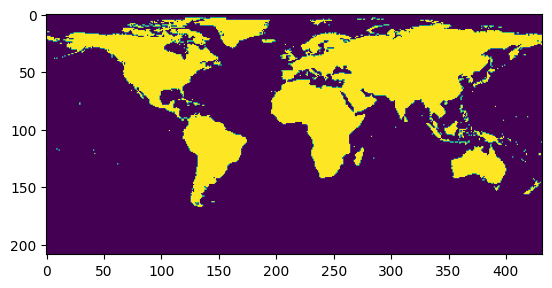

In [7]:
plt.imshow(lsm[::100,::100])
plt.show()

In [8]:
land = np.where(lsm)
land = np.transpose(np.stack(land))

In [9]:
land

array([[  299, 12018],
       [  299, 12019],
       [  299, 12020],
       ...,
       [16865, 13354],
       [16865, 13355],
       [16865, 13356]])

In [18]:
import matplotlib.pyplot as plt
from tqdm import tqdm
with rioxarray.open_rasterio(climatology_dir + "cmi" + "/CHELSA_" + "cmi" + "_" + "01" + "_1981-2010_V.2.1.tif", cache=False) as f:
    y, x = land[-1]
    print(f[0, y, x])
    print(f.shape)
    # x = lon, y = lat

    # Saving the lon/lat for each land-(x,y)
    coors = np.zeros_like(land, dtype="float")
    for i in tqdm(range(len(land))):
        y, x = land[i]
        loc = f[0, y, x]
        coors[i][0] = loc["x"] # Saving as lon/lat
        coors[i][1] = loc["y"]
    coors = np.array(coors)
    np.save(CHELSA_DIR + '/input/point_to_coord.npy', coors)

<xarray.DataArray ()> Size: 2B
[1 values with dtype=int16]
Coordinates:
    band         int64 8B 1
    x            float64 8B -68.7
    y            float64 8B -56.55
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     32767
    scale_factor:   0.1
    add_offset:     0.0
(1, 20880, 43200)


100%|██████████| 224368589/224368589 [8:38:01<00:00, 7218.63it/s]  


In [11]:
coors = np.load(CHELSA_DIR + '/input/point_to_coord.npy')

In [12]:
coors[:10]

array([[-79.84597262,  81.50402709],
       [-79.83763929,  81.50402709],
       [-79.82930596,  81.50402709],
       [-79.82097262,  81.50402709],
       [-79.81263929,  81.50402709],
       [-79.80430596,  81.50402709],
       [-79.79597262,  81.50402709],
       [-79.78763929,  81.50402709],
       [-79.77930596,  81.50402709],
       [-79.77097262,  81.50402709]])

In [15]:
np.save(CHELSA_DIR + '/input/land_coordinates.npy', land)

In [14]:
land_train = land
coors_train = coors
# Take 10% of train as val
val_index = np.random.choice(len(land_train), math.floor(len(land_train)/10), replace=False)
land_val = land_train[val_index]
coors_val = coors_train[val_index]
land_train = np.delete(land_train, val_index, 0)
coors_train = np.delete(coors_train, val_index, 0)
# Take 50% of val (thus 5% of train) as test
test_index = np.random.choice(len(land_val), math.floor(len(land_val)/2), replace=False)
land_test = land_val[test_index]
coors_test = coors_val[test_index]
land_val = np.delete(land_val, test_index, 0)
coors_val = np.delete(coors_val, test_index, 0)
print(land_train.shape, coors_train.shape)
print(land_val.shape, coors_val.shape)
print(land_test.shape, coors_test.shape)

(201931731, 2) (201931731, 2)
(11218429, 2) (11218429, 2)
(11218429, 2) (11218429, 2)


In [15]:
np.save(CHELSA_DIR + '/input/land_coordinates_train.npy', land_train)
np.save(CHELSA_DIR + '/input/land_coordinates_val.npy', land_val)
np.save(CHELSA_DIR + '/input/land_coordinates_test.npy', land_test)
np.save(CHELSA_DIR + '/input/point_to_coord_train.npy', coors_train)
np.save(CHELSA_DIR + '/input/point_to_coord_val.npy', coors_val)
np.save(CHELSA_DIR + '/input/point_to_coord_test.npy', coors_test)

In [105]:
lsm = Dataset(CHELSA_DIR + '/input/landseamask.nc')

In [127]:
lsm["crs"]

<class 'netCDF4._netCDF4.Variable'>
|S1 crs()
    grid_mapping_name: latitude_longitude
    long_name: CRS definition
    longitude_of_prime_meridian: 0.0
    semi_major_axis: 6378137.0
    inverse_flattening: 298.257223563
    spatial_ref: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
    GeoTransform: -180.00013888885 0.008333333300000001 0 83.99986041515001 0 -0.008333333300000001 
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of   used

In [135]:
for bio in tqdm(bio_files):
    sample_file = CHELSA_DIR + "/climatologies/1981-2010/bio/" + bio

100%|██████████| 19/19 [00:00<00:00, 330671.27it/s]


In [136]:
sample = rioxarray.open_rasterio(sample_file)

In [157]:
sample.coords

Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * y            (y) float64 84.0 83.99 83.98 83.97 ... -89.98 -89.99 -90.0
    spatial_ref  int64 0

In [159]:
sample[0, 200,200]["y"]

<xarray.DataArray 'y' ()>
array(82.32902709)
Coordinates:
    band         int64 1
    x            float64 -178.3
    y            float64 82.33
    spatial_ref  int64 0

In [1]:
import rioxarray
import os
import json
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [10]:
# Load all files
month = "03"
#var_names = ["clt", "cmi", "hurs", "pet", "pr", "rsds", "sfcWind", "tas", "tasmax", "tasmin", "vpd"]
var_names = ["cmi", "hurs", "pet", "pr", "rsds", "sfcWind", "tas", "tasmax", "tasmin", "vpd"]
CHELSA_DIR = "/home/eco08/Desktop/CHELSA/envicloud/chelsa/chelsa_V2/GLOBAL/"
climatology_dir = CHELSA_DIR + "climatologies/1981-2010/"
raster = {}
for var in var_names:
    if var == "pet":
        raster_file_name = climatology_dir + var + "/CHELSA_pet_penman_" + str(month) + "_1981-2010_V.2.1.tif"
    elif var == "rsds":
        raster_file_name = climatology_dir + var + "/CHELSA_" + var + "_1981-2010_" + str(month) + "_V.2.1.tif"
    else:
        raster_file_name = climatology_dir + var + "/CHELSA_" + var + "_" + str(month) + "_1981-2010_V.2.1.tif"
    raster[var] = rioxarray.open_rasterio(raster_file_name, cache=False).load()

In [3]:
lsm = np.array(raster["cmi"])[0]>30000

def convert_to_float16_np(name):
    print(name)
    as_np = np.ma.masked_array(raster[name][0].to_numpy(), lsm)
    mean = as_np.mean()
    std = as_np.std()
    as_np = as_np - mean
    as_np = as_np / std
    return as_np.astype("float16")

In [ ]:
float16_nps = {}
for var in var_names:
    float16_nps[var] = convert_to_float16_np(var)

cmi


In [ ]:
float16_nps["cmi"]

dtype('float64')

In [3]:
import numpy as np
path = "/home/eco08/Desktop/CHELSA/envicloud/chelsa/chelsa_V2/GLOBAL/climatologies/01_monthly_float16"
with open(path, "rb") as f:
    janu = np.load(f)
janu.shape

(11, 20880, 43200)

In [6]:
import matplotlib.pyplot as plt
for i in range(11):
    r = janu[i]
    print(r.max(), r.min())

34.16 -3.553
2.746 -2.133
2.586 -2.77
8.42 -0.9336
70.44 -0.695
2.885 -1.167
34.03 -1.898
1.6875 -2.088
1.727 -2.1
1.625 -2.148
4.445 -0.853


array([[[2.7432575, 2.7432575, 2.7423456, ..., 2.7432575, 2.7432575,
         2.7432575],
        [2.7423456, 2.7423456, 2.7423456, ..., 2.7423456, 2.7423456,
         2.7423456],
        [2.7423456, 2.7414334, 2.7414334, ..., 2.7414334, 2.7414334,
         2.7423456],
        ...,
        [2.4222093, 2.4222093, 2.4222093, ..., 2.4222093, 2.4222093,
         2.4222093],
        [2.4249456, 2.4203851, 2.4212973, ..., 2.4212973, 2.4203851,
         2.4203851],
        [2.4222093, 2.4222093, 2.4231215, ..., 2.4231215, 2.4222093,
         2.4222093]]], dtype=float32)